In [1]:
# Initialisation
import write_files as wf
import lpse_data as ld
import numpy as np
import matplotlib.pyplot as plt

# Ipython magic features
%load_ext autoreload
%autoreload 2
  
# LPSE class
lpse = ld.lpse_case()
lpse.dfp = './data/lpse.' # Data file prefix
lpse.verbose = True # Show prints
lpse.np = 1 # Number of processors
lpse.bin = '../../bin/lpse_cpu' # Binary location

LPSE user guide contains additional options to those listed

# Job Control

In [2]:
# Job control file options
jc = wf.job_control()
jc.version = '3.2.11'
jc.verbose = 2
jc.seed = 1 # 0 for random, otherwise fixed seed
jc.resources.heartbeatInterval = 0.1 # minutes
lpse.add_class(jc)

Setup class added.


# Gridding

In [3]:
# Gridding file options
gr = wf.gridding()
gr.grid.sizes = 100 # microns
gr.grid.nodes = 4000
gr.grid.antiAliasing.range = 0.333
gr.grid.antiAliasing.isAutomatic = 'false'
lpse.add_class(gr)

Setup class added.


# Components

In [4]:
cm = wf.components()
cm.laser.enable = 'true'
cm.raman.enable = 'true'
cm.lw.enable = 'true'
cm.iaw.enable = 'false'
cm.hpe.enable = 'false'
lpse.add_class(cm)

Setup class added.


# Temporal Control

In [5]:
tc = wf.temporal_control()
tc.simulation.samplePeriod = 0.05 # ps
tc.simulation.time.end = 2 # ps
lpse.add_class(tc)

Setup class added.


# I/O Control

In [6]:
# Specifying a filename turns on output
io = wf.io_control()
io.grid.downSampleFactors = 4 # Spatial downsampling per dimension
io.lw.save.pots = lpse.dfp + 'pots'
io.laser.save.E0.z = lpse.dfp + 'E0_z'
io.laser.save.S0.x = lpse.dfp + 'S0_x'
io.raman.save.E0.z = lpse.dfp + 'E1_z'
io.raman.save.S0.x = lpse.dfp + 'S1_x'
io.raman.save.E0.__dict__['2'] = None
lpse.add_class(io)

Setup class added.


# Physical Parameters

In [7]:
pp = wf.physical_parameters()
pp.physical.Z = 3
pp.physical.Te = 0.1 # keV
pp.physical.Ti = 0.1 # keV
pp.physical.MiOverMe = 1836.15
pp.lw.envelopeDensity = 0.152
pp.densityProfile.shape = 'linear'
pp.densityProfile.geometry = 'cartesian'
pp.densityProfile.NminOverNc = 0.145
pp.densityProfile.NmaxOverNc = 0.155
pp.densityProfile.NminLocation = '-50 0 0'
pp.densityProfile.NmaxLocation = '50 0 0'
lpse.add_class(pp)

Setup class added.


# Light Control

In [8]:
lc = wf.light_control()
lc.laser.pumpDepletion.SRS.enable = 'true'
lc.laser.ionAcousticPerturbations.enable = 'false'
lc.laser.wavelength = 0.351
lc.laser.solver = 'fd'
lc.laser.evolution.dtFraction = 0.95
lc.laser.evolution.Labc = 3 # microns
lc.laser.evolution.abc.type = 'pml'
lc.laser.evolution.Loff = 1 # microns
lc.laser.evolution.absorption = 0
lc.raman.sourceTerm.lw.enable = 'true'
lc.raman.ionAcousticPerturbations.enable = 'false'
lc.raman.solver = 'fd'
lc.raman.evolution.dtFraction = 0.95
lc.raman.evolution.Labc = 3
lc.raman.evolution.abc.type = 'pml'
lc.raman.evolution.absorption = 0
lpse.add_class(lc)

Setup class added.


# Light Sources

In [9]:
ls = wf.light_source()
ls.laser.nBeams = 1
ls.laser.intensity = ['2e+14'] # W/cm^2
ls.laser.phase = [0] # degrees
ls.laser.polarization = [90] # degrees
ls.laser.direction = ['1 0 0']
ls.laser.frequencyShift = [0]
ls.laser.group = [0]
ls.laser.evolution.source = ['min.x']
ls.laser.evolution.offset = ['0 0 0'] # microns
ls.laser.evolution.width = [10] # Half-width at 1/e of sgauss [um]
ls.laser.evolution.sgOrder = [4]
ls.raman.nBeams = 1
ls.raman.intensity = ['1e+12'] # W/cm^2
ls.raman.phase = [0] # degrees
ls.raman.polarization = [90] # degrees
ls.raman.direction = ['-1 0 0']
ls.raman.frequencyShift = [0]
ls.raman.group = [0]
ls.raman.evolution.source = ['max.x']
ls.raman.evolution.offset = ['0 0 0'] # microns
ls.raman.evolution.width = [10] # Half-width at 1/e of sgauss [um]
ls.raman.evolution.sgOrder = [4] 
lpse.add_class(ls)

Setup class added.


# Langmuir Wave Parameters

In [10]:
lwc = wf.lw_control()
lwc.lw.SRS.enable = 'true'
lwc.lw.spectral.dt = 0.002 # ps
lwc.lw.maxLightStepsPerStep = 10
lwc.lw.Labc = 3 # microns
lwc.lw.noise.enable = 'false'
lwc.lw.noise.isCalculated = 'false'
lwc.lw.noise.amplitude = 1.67772
lwc.lw.collisionalDampingRate = 0.1
lwc.lw.__dict__['collisionalDampingRate.isCalculated'] = 'false'
lpse.add_class(lwc)

Setup class added.


# Ion Acoustic Wave Parameters

In [11]:
iawc = wf.iaw_control()
lpse.add_class(iawc)

Setup class added.


# Instrumentation

In [12]:
ins = wf.instrumentation()
ins.metrics.enable = 'true'
ins.metrics.file = lpse.dfp + 'metrics'
ins.metrics.samplePeriod = 0.01 # ps
lpse.add_class(ins)

Setup class added.


# Run case

In [13]:
if lpse.verbose:
  lpse.write()
  !{'mpirun -np '+str(lpse.np)+' '+lpse.bin+' --parms=lpse.parms'}
else:
  lpse.run()

File 'lpse.parms' written.
 ==================================== LPSE  ====================================

 LPSE: 3.2.11

Reading parameter file: lpse.parms

version=3.2.11;
seed=1;
verbose=2;
resources.heartbeatInterval=0.1;
grid.sizes=100;
grid.nodes=4000;
grid.downSampleFactors=4;
grid.antiAliasing.range=0.333;
grid.antiAliasing.isAutomatic=false;
laser.enable=true;
raman.enable=true;
lw.enable=true;
iaw.enable=false;
hpe.enable=false;
laser.solver=fd;
laser.pumpDepletion.SRS.enable=true;
raman.solver=fd;
simulation.samplePeriod=0.05;
simulation.time.end=2;
lw.save.pots=./data/lpse.pots;
physical.Z=3;
physical.Te=0.1;
physical.Ti=0.1;
physical.MiOverMe=1836.15;
lw.envelopeDensity=0.152;
densityProfile.shape=linear;
densityProfile.geometry=cartesian;
densityProfile.NminOverNc=0.145;
densityProfile.NmaxOverNc=0.155;
densityProfile.NminLocation=-50 0 0;
densityProfile.NmaxLocation=50 0 0;
lw.SRS.enable=true;
lw.noise.enable=false;
lw.noise.isCalculated=false;
lw.noise.amplitude=1.677


  Time step sizes:
  {
    lightSolver-timeStep: 0.037 fs
    ramanSolver-timeStep: 0.019 fs
    lwSolver-timeStep: 0.185 fs
  }

  Running (from: 0.000, to: 2.000 ps, by: 0.019 fs, I/O: 0.0500 ps)
  (107995 time steps)
  {
    [frame:1][frame:2][frame:3][9.5%,WT:0.1][frame:4][frame:5][frame:6]
    [frame:7][frame:8][21.2%,WT:0.2][frame:9][frame:10][frame:11][frame:12]
    [frame:13][33.0%,WT:0.3][frame:14][frame:15][frame:16][frame:17][44.1%,WT:0.4][frame:18]
    [frame:19][frame:20][frame:21][frame:22][55.9%,WT:0.5][frame:23][frame:24]
    [frame:25][frame:26][67.4%,WT:0.6][frame:27][frame:28][frame:29][frame:30]
    [frame:31][79.2%,WT:0.7][frame:32][frame:33][frame:34][frame:35][frame:36]
    [90.9%,WT:0.8][frame:37][frame:38][frame:39][frame:40]
  }

  Job Summary
  {
    Simulation Timings
    {
      simulated steps: 107995
       simulated time: 2.000 ps
    }

    Wall-Clock Timings
    {
                  setup-time: 0.177 sec
                    run-time: 52.584 sec
       

# Post-processing

In [14]:
lpse.metrics()
print(lpse.mkeys)

Metrics data extracted.
['time', 'rho_max', 'rho_rms', 'E_epw_max', 'EPW_energy', 'EPW_power_absorbed_by_LD', 'EPW_power_absorbed_by_collisional_damping', 'EPW_power_absorbed_by_boundaries', 'E0_max', 'E0_energy', 'E0_power_injected', 'E0_power_absorbed_by_collisional_damping', 'E1_max', 'E1_energy', 'E1_power_injected', 'E1_power_absorbed_by_collisional_damping']


In [15]:
lpse.fields()
print(lpse.fkeys)

Fields data extracted.
['pots', 'E0_z', 'S0_x', 'E1_z', 'S1_x']


<IPython.core.display.Javascript object>


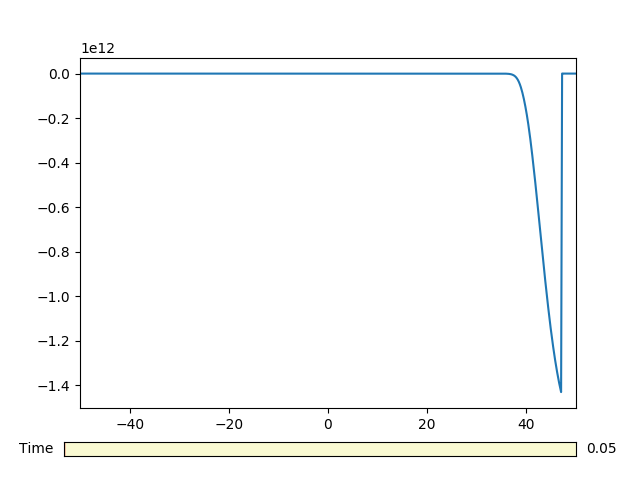

In [27]:
%matplotlib notebook
lpse.plot_field('S1_x')

<IPython.core.display.Javascript object>


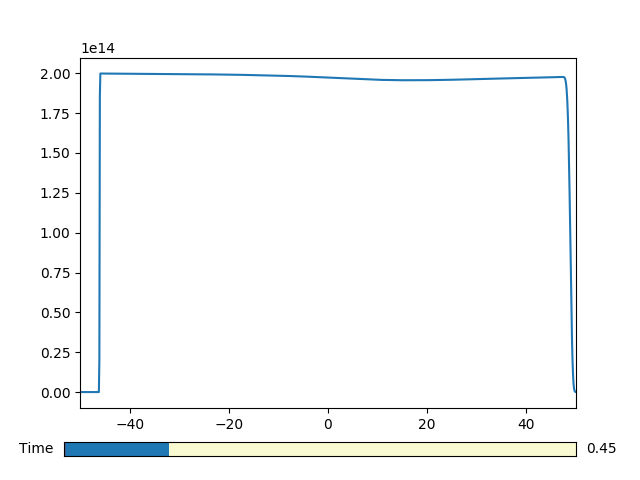

In [30]:
lpse.plot_field('S0_x')

In [23]:
# Laser light transmission at final timestep
icell = 50
ocell = -50
linx = lpse.fdat['S0_x']['x'][icell]
lin = np.real(lpse.fdat['S0_x']['data'][-1,icell]) 
loutx = lpse.fdat['S0_x']['x'][ocell]
lout = np.real(lpse.fdat['S0_x']['data'][-1,ocell])
enl = 1-lout/lin
print(f'Laser inner Poynting flux (at {linx:0.1f} um)' \
      + f' at sim end: {lin:0.3e} W/cm^2')
print(f'Laser outer Poynting flux (at {loutx:0.1f} um)' \
      + f' at sim end: {lout:0.3e} W/cm^2')
print(f'This is an energy loss of {enl:.2%}')

Laser inner Poynting flux (at -45.0 um) at sim end: 1.999e+14 W/cm^2
Laser outer Poynting flux (at 45.1 um) at sim end: 1.925e+14 W/cm^2
This is an energy loss of 3.71%


In [18]:
# Raman light energy gain at final timestep
icell = -50
ocell = 50
rinx = lpse.fdat['S1_x']['x'][icell]
rin = np.real(lpse.fdat['S1_x']['data'][-1,icell]) 
routx = lpse.fdat['S1_x']['x'][ocell]
rout = np.real(lpse.fdat['S1_x']['data'][-1,ocell])
eng = rout/rin - 1
lenl = abs(rout-rin)/(lin-lout)
print(f'Raman inner Poynting flux (at {rinx:0.1f} um)' \
      + f' at sim end: {rin:0.3e} W/cm^2')
print(f'Raman outer Poynting flux (at {routx:0.1f} um)' \
      + f' at sim end: {rout:0.3e} W/cm^2')
print(f'This is an energy gain of {eng:.2%}')
print(f'It represents {lenl:.2%} of the laser energy loss')

Raman inner Poynting flux (at 45.1 um) at sim end: -1.590e+12 W/cm^2
Raman outer Poynting flux (at -45.0 um) at sim end: -8.640e+12 W/cm^2
This is an energy gain of 443.51%
It represents 95.20% of the laser energy loss
